# 3D Trajectories: (A,B) vs (A_tilde,B_tilde)
Run the code cell below to generate 3D trajectory plots for bad and good initial states.

||Delta x_k|| for bad x0: [0. 0. 0. 0. 0. 0. 0. 0. 0.]
||Delta x_k|| for good x0: [0.00000000e+00 1.14564392e+00 3.25300342e+00 7.15858655e+00
 1.52841120e+01 3.77495347e+01 1.13031634e+02 3.65312259e+02
 1.18002404e+03]


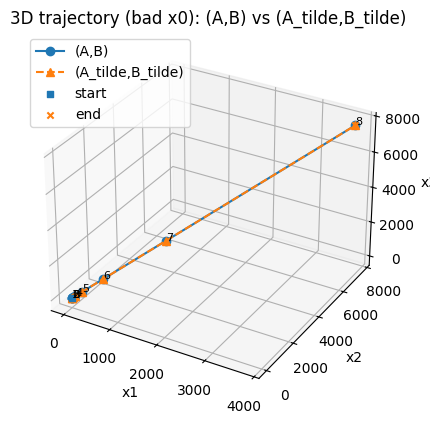

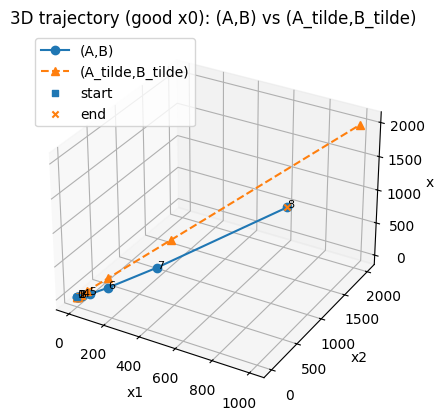

In [3]:

# 3D visualization of trajectories for (A,B) and (A_tilde,B_tilde)
# Policy: matplotlib only, one chart per figure, no explicit colors.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (ensures 3D projection is registered)

# System matrices
A = np.array([[1.0, 1.0, 0.0],
              [0.0, 2.0, 1.0],
              [0.0, 0.0, 3.0]])
B = np.array([[1.0],
              [1.0],
              [1.0]])
w = np.array([[0.0],
              [-1.0],
              [1.0]])
u_vec = np.array([[1.0],
                  [0.5],
                  [-0.25]])  # rank-1 update vector

# Modified pair
A_tilde = A + u_vec @ w.T
B_tilde = B.copy()

# Initial states
x0_bad  = np.array([[1.0],[1.0],[1.0]])  # w^T x0 = 0  (indistinguishable case)
x0_good = np.array([[0.0],[1.0],[0.0]])  # w^T x0 = -1 (distinguishable case)

# Input sequence
u_seq = np.array([1.0, -2.0, 0.5, 3.0, -1.0, 0.0, 2.0, -0.5])
T = len(u_seq)

def simulate(A, B, x0, u_seq):
    n = A.shape[0]
    xs = np.zeros((T+1, n))
    xs[0] = x0.ravel()
    x = x0.copy()
    for k in range(T):
        x = A @ x + B * u_seq[k]
        xs[k+1] = x.ravel()
    return xs

# Simulate
Xs_bad_A     = simulate(A,       B,       x0_bad,  u_seq)
Xs_bad_At    = simulate(A_tilde, B_tilde, x0_bad,  u_seq)
Xs_good_A    = simulate(A,       B,       x0_good, u_seq)
Xs_good_At   = simulate(A_tilde, B_tilde, x0_good, u_seq)

# Helper to annotate steps
def annotate_steps(ax, Xs):
    for k in range(Xs.shape[0]):
        ax.text(Xs[k,0], Xs[k,1], Xs[k,2], str(k), fontsize=8)

# 3D plot for BAD x0 (trajectories coincide)
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection="3d")
ax1.plot(Xs_bad_A[:,0],  Xs_bad_A[:,1],  Xs_bad_A[:,2],  marker="o", label="(A,B)")
ax1.plot(Xs_bad_At[:,0], Xs_bad_At[:,1], Xs_bad_At[:,2], marker="^", linestyle="--", label="(A_tilde,B_tilde)")
ax1.scatter(Xs_bad_A[0,0], Xs_bad_A[0,1], Xs_bad_A[0,2], marker="s", label="start")
ax1.scatter(Xs_bad_A[-1,0], Xs_bad_A[-1,1], Xs_bad_A[-1,2], marker="x", label="end")
annotate_steps(ax1, Xs_bad_A)
ax1.set_title("3D trajectory (bad x0): (A,B) vs (A_tilde,B_tilde)")
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_zlabel("x3")
ax1.legend()
ax1.grid(True)
plt.savefig("3d_bad_x0.png")

# 3D plot for GOOD x0 (trajectories differ)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection="3d")
ax2.plot(Xs_good_A[:,0],  Xs_good_A[:,1],  Xs_good_A[:,2],  marker="o", label="(A,B)")
ax2.plot(Xs_good_At[:,0], Xs_good_At[:,1], Xs_good_At[:,2], marker="^", linestyle="--", label="(A_tilde,B_tilde)")
ax2.scatter(Xs_good_A[0,0], Xs_good_A[0,1], Xs_good_A[0,2], marker="s", label="start")
ax2.scatter(Xs_good_A[-1,0], Xs_good_A[-1,1], Xs_good_A[-1,2], marker="x", label="end")
annotate_steps(ax2, Xs_good_A)
ax2.set_title("3D trajectory (good x0): (A,B) vs (A_tilde,B_tilde)")
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.set_zlabel("x3")
ax2.legend()
ax2.grid(True)
plt.savefig("3d_good_x0.png")

# Print quick checks
diff_bad = np.linalg.norm(Xs_bad_A - Xs_bad_At, axis=1)
diff_good = np.linalg.norm(Xs_good_A - Xs_good_At, axis=1)
print("||Delta x_k|| for bad x0:", diff_bad)
print("||Delta x_k|| for good x0:", diff_good)

